In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mode

In [32]:
df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [4]:
df_flights.count()

Year                 271940
Month                271940
DayofMonth           271940
DayOfWeek            271940
Carrier              271940
OriginAirportID      271940
OriginAirportName    271940
OriginCity           271940
OriginState          271940
DestAirportID        271940
DestAirportName      271940
DestCity             271940
DestState            271940
CRSDepTime           271940
DepDelay             271940
DepDel15             269179
CRSArrTime           271940
ArrDelay             271940
ArrDel15             271940
Cancelled            271940
dtype: int64

In [5]:
#Modulo 5

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Are some days of the week more prone to arrival days than others?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*

# 01 - Clean missing values.

In [6]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

for the flights dataframe we only select the rows wit null values in the column DepDel15, looking at the statistic sumary for this records in the column DepDelay we can see that all the null values in the column DepDel15 have 0 DepDelay, therefore we will fill the null values with 0.

In [7]:
df_flights[df_flights["DepDel15"].isnull()]["DepDelay"].describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [33]:
df_flights["DepDel15"]=df_flights["DepDel15"].fillna(0)

In [9]:
df_flights.count()

Year                 271940
Month                271940
DayofMonth           271940
DayOfWeek            271940
Carrier              271940
OriginAirportID      271940
OriginAirportName    271940
OriginCity           271940
OriginState          271940
DestAirportID        271940
DestAirportName      271940
DestCity             271940
DestState            271940
CRSDepTime           271940
DepDelay             271940
DepDel15             271940
CRSArrTime           271940
ArrDelay             271940
ArrDel15             271940
Cancelled            271940
dtype: int64

# 01 - Eliminating outliars values in DepDelay and ArrDelay

In [52]:
def plotDataStats(dataFrameCol):
    numpyArrData=dataFrameCol.to_numpy()
    mean=np.mean(numpyArrData)
    max=np.max(numpyArrData)
    min=np.min(numpyArrData)
    median=np.median(numpyArrData)
    
    print("Min:"+str(min)+"\n Mean:"+str(mean)+"\n max:"+str(max)+"\n median:"+str(median))
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,8))
    # Plot the histogram   
    ax[0].hist(numpyArrData)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median
    ax[0].axvline(x=mean, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median, color = 'red', linestyle='dashed', linewidth = 2)
    
    ax[0].axvline(x=np.percentile(numpyArrData, 1), color = 'blue', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 5), color = 'blue', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 10), color = 'blue', linestyle=':', linewidth = 2)
    
    
    ax[0].axvline(x=np.percentile(numpyArrData, 99), color = 'black', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 95), color = 'black', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 90), color = 'black', linestyle=':', linewidth = 2)
    # Plot the boxplot   
    ax[1].boxplot(numpyArrData, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle(dataFrameCol.name)
    fig.show()


    
    

Min:-63
 Mean:10.350448628373906
 max:1425
 median:-1.0
Min:-75
 Mean:6.496649996322718
 max:1440
 median:-3.0


C:\Users\super\AppData\Local\Temp\ipykernel_6444\2199240154.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\super\AppData\Local\Temp\ipykernel_6444\2199240154.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


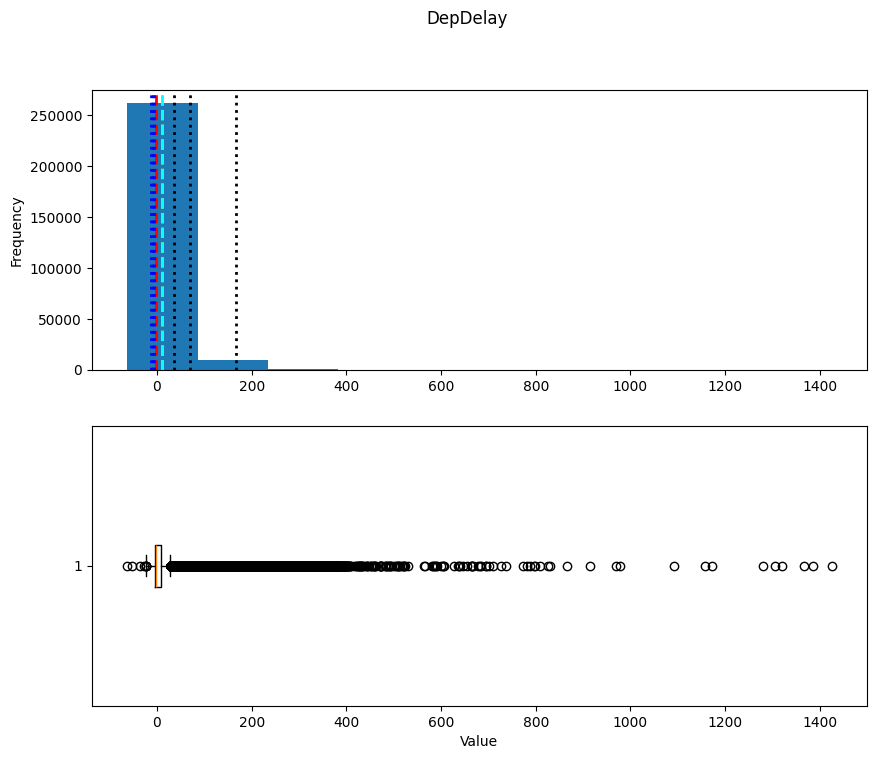

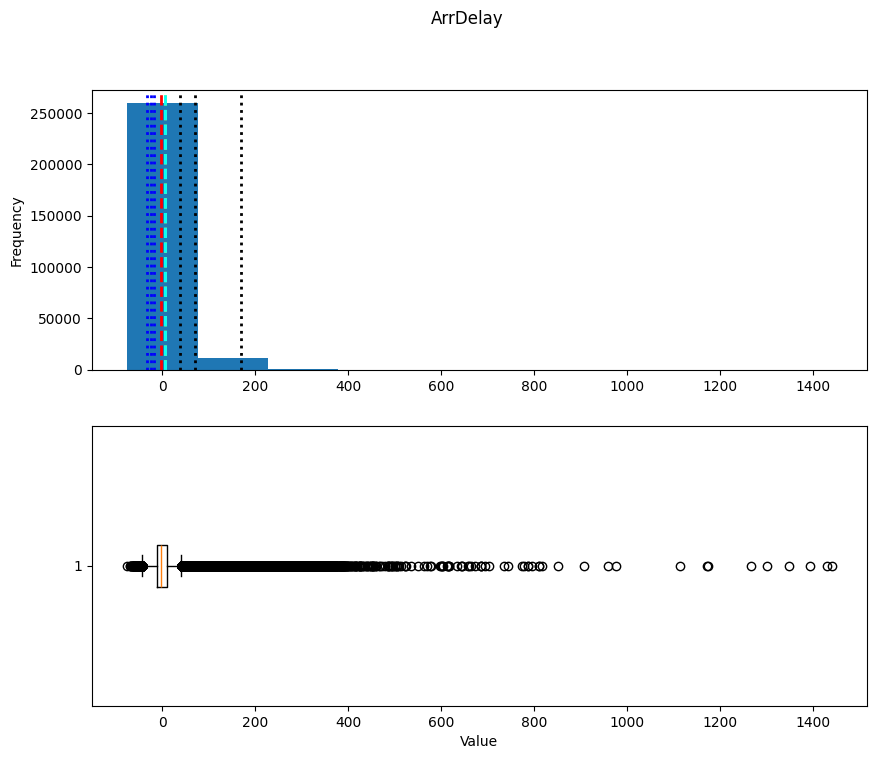

In [35]:
# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    plotDataStats(df_flights[col])

In [36]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [37]:
# Trim outliers for DepDelay based on 1% and 95% percentiles
df_flights=df_flights.sort_values(by="DepDelay")[:int(len(df_flights["DepDelay"])*.95)]
# Trim outliers for ArrDelay based on 1% and 95% percentiles
df_flights=df_flights.sort_values(by="ArrDelay")[:int(len(df_flights["DepDelay"])*.95)]
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
108177,2013,5,6,1,AA,12478,John F. Kennedy International,New York,NY,14747,Seattle/Tacoma International,Seattle,WA,1830,-4,0.0,2200,-75,0,0
218357,2013,4,30,2,DL,12478,John F. Kennedy International,New York,NY,12892,Los Angeles International,Los Angeles,CA,1445,-5,0.0,1819,-68,0,0
85071,2013,5,6,1,9E,12478,John F. Kennedy International,New York,NY,13198,Kansas City International,Kansas City,MO,1859,-13,0.0,2134,-68,0,0
130501,2013,10,16,3,UA,12889,McCarran International,Las Vegas,NV,11618,Newark Liberty International,Newark,NJ,805,-15,0.0,1608,-67,0,0
224073,2013,5,12,7,UA,13930,Chicago O'Hare International,Chicago,IL,14908,John Wayne Airport-Orange County,Santa Ana,CA,1547,-6,0.0,1824,-66,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67025,2013,8,12,1,9E,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,13342,General Mitchell International,Milwaukee,WI,1605,45,1.0,1622,39,1,0
67374,2013,10,19,6,EV,12953,LaGuardia,New York,NY,14524,Richmond International,Richmond,VA,1105,26,1.0,1248,39,1,0
132189,2013,5,14,2,WN,14107,Phoenix Sky Harbor International,Phoenix,AZ,12339,Indianapolis International,Indianapolis,IN,1715,25,1.0,2330,39,1,0
615,2013,5,24,5,UA,12266,George Bush Intercontinental/Houston,Houston,TX,14100,Philadelphia International,Philadelphia,PA,1009,44,1.0,1437,39,1,0


Min:-63
 Mean:1.9011795864317
 max:70
 median:-1.0
Min:-75
 Mean:-2.944333299378629
 max:39
 median:-5.0


C:\Users\super\AppData\Local\Temp\ipykernel_6444\2199240154.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\super\AppData\Local\Temp\ipykernel_6444\2199240154.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


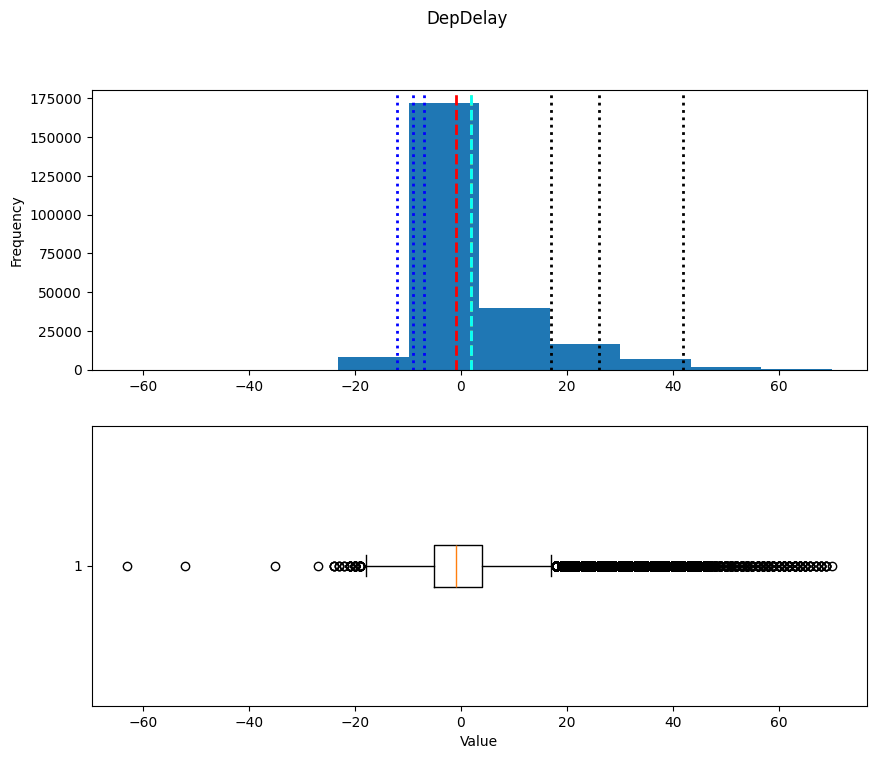

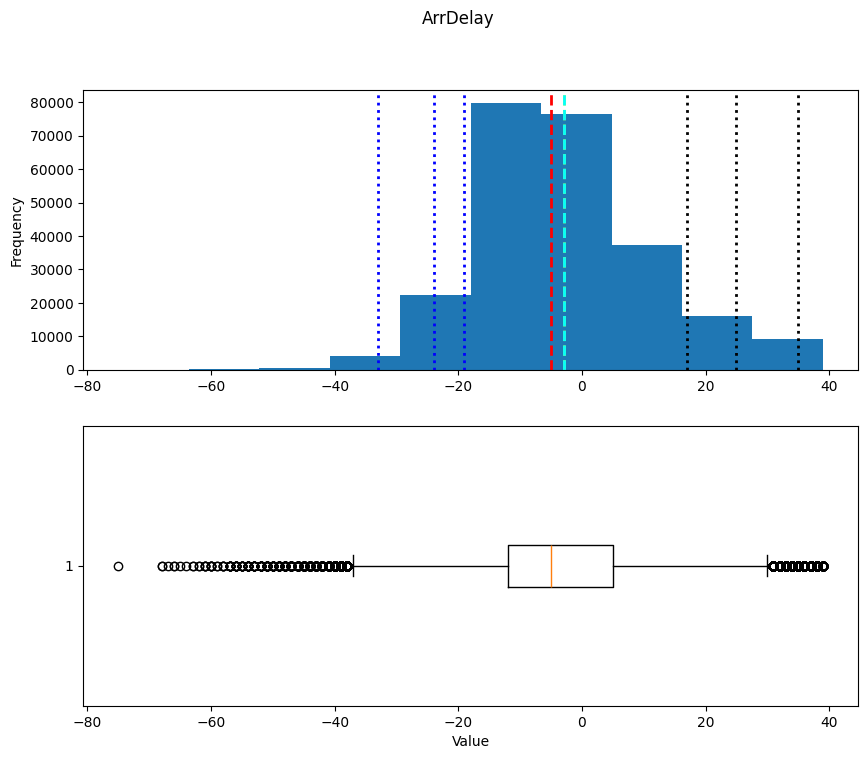

In [38]:
# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    plotDataStats(df_flights[col])

# 02 - Explore de Data

2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.

In [45]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,245425.0,245425.000000,245425.000000,245425.000000,245425.000000,245425.000000,245425.000000,245425.000000,245425.000000,245425.000000,245425.000000,245425.000000,245425.000000
mean,2013.0,7.013026,15.805912,3.904578,12752.197421,12741.150474,1303.393603,1.901180,0.119254,1484.694465,-2.944333,0.131221,0.011727
std,0.0,1.999730,8.838714,1.994034,1505.762328,1503.861299,470.661135,10.925077,0.324088,490.271755,14.188854,0.337643,0.107653
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-5.000000,0.000000,1107.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1300.000000,-1.000000,0.000000,1505.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1710.000000,4.000000,0.000000,1905.000000,5.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,70.000000,1.000000,2359.000000,39.000000,1.000000,1.000000


### What are the average (mean) departure and arrival delays?

In [46]:
df_flights[delayFields].mean()

DepDelay    1.901180
ArrDelay   -2.944333
dtype: float64

### How do the carriers compare in terms of arrival delay performance?

In [47]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

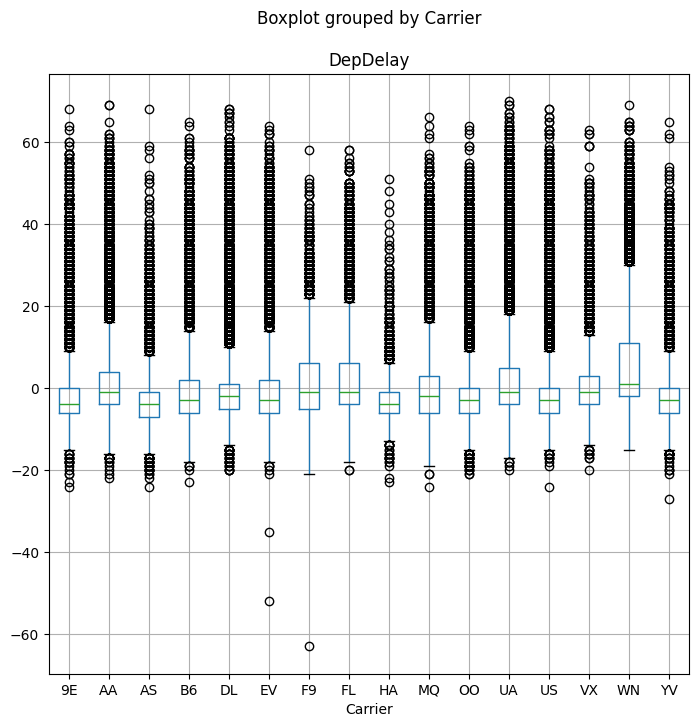

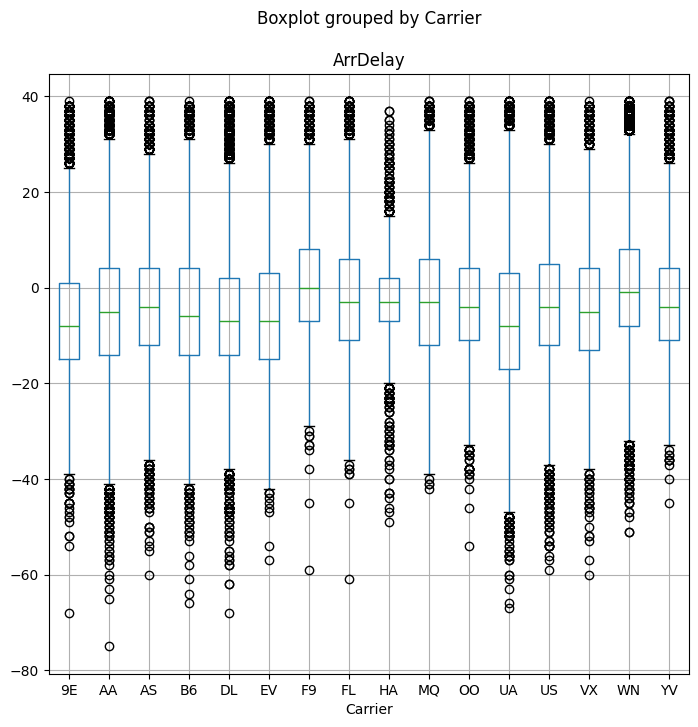

In [56]:
for col in delayFields:
    df_flights.boxplot(column=col, by='Carrier', figsize=(8,8))

#### Are some days of the week more prone to arrival days than others?

In [57]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

<Axes: title={'center': 'ArrDelay'}, xlabel='DayOfWeek'>

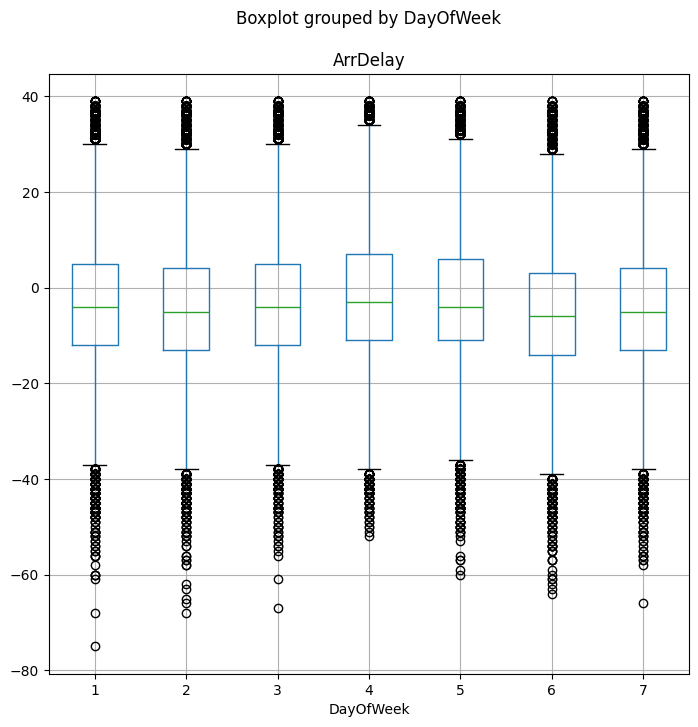

In [58]:
df_flights.boxplot(column="ArrDelay", by='DayOfWeek', figsize=(8,8))

### Which departure airport has the highest average departure delay?

In [68]:
depAirGroup = df_flights.groupby(df_flights["OriginAirportName"])
df_depByAir=pd.DataFrame(depAirGroup['DepDelay'].mean())
#We will take the last value that is the airport with the highest avarage departure delay 
df_depByAir.sort_values("DepDelay")[-1:]

,DepDelay
OriginAirportName,
Chicago Midway International,7.305715



### Do **late** departures tend to result in longer arrival delays than on-time departures?

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

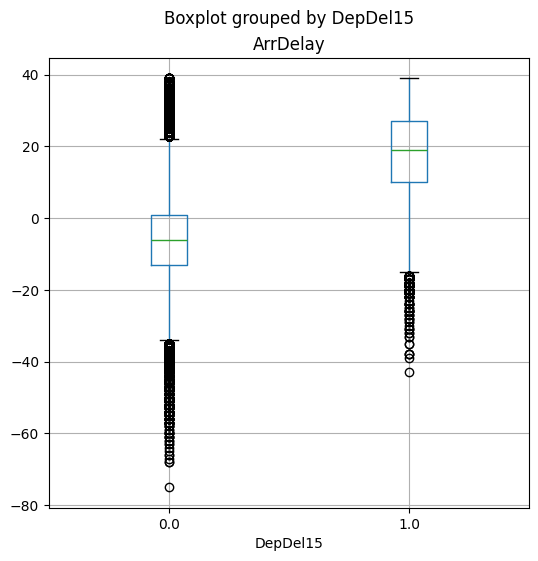

In [70]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(6,6))

In [73]:
correlation_coefficient = df_flights['DepDelay'].corr(df_flights['ArrDelay'])
print("The correlation coefficient between the departure delay and the arrive delay is: {}".format(correlation_coefficient))

The correlation coefficient between the departure delay and the arrive delay is: 0.6569345406047492
